# **Welcome to the Demo Notebook for Making Corpus**

In this demo notebook we go through the `corpus_maker.py` module and demonstrate its functionality.<br>

**Note:** It is needed to run the webscraping notebook first in order to obtain the master's theses and the preprocessing notebook to then obtain the input for the corpus .

**Disclaimer:** The notebook was run by the authors on the "mavis" computing server (1024 GB memory; 40 physical cores at 3.1 GHz) of the Humboldt Lab for Empirical and Quantitative Research. Execution time may be significantly longer for other users.

### **The Dependencies**

First  import some basic libraries and then install the requirements to set up the environment needed for the project.

**Note:** It is not needed to install the requirements again if the user has already installed them in another module of the project.

In [ ]:
# Install Requirements
!pip install -r ../requirements.txt

In [1]:
# Basic libraries
import re
import os
import gc
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import time

import sys
sys.path.append("..")
from measure_time import measure_time

In [2]:
os.getcwd()

'/home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_3_Making_Corpus'

## Making the corpus

For this we use the customly designed  `CorpusMaker` class, which includes four methods.

```python

CorpusMaker.make_corpus: 'Sets up the corpus, returns corpus, dictionary, ID mapping and texts. Dimensions are further reduced by removing words that appear rarely within the entire corpus. The returns are pickled and automatically saved to folder DICT_CORP.'
CorpusMaker.show_top_words: 'Prints selected amount of most frequent words per thesis.'
CorpusMaker.make_wordcloud: 'Generates word cloud image. The image is automatically saved.'
CorpusMaker.make_UMAP: 'Generates UMAP graph of terms inside the corpus. The image is automatically saved.'


In [3]:
# Import the class
from corpus_maker import CorpusMaker

In [4]:
# Inspect the class
CorpusMaker?

Init signature: CorpusMaker(input_folder)
Docstring:     
A class used for turning the filtered LvB MSc theses into a corpus. Generally, this class can also be used to generate a corpus from any set of .txt files that have already gone through standard NLP preprocessing. 

Outputs are saved as pickle files in automatically generated folder DICT_CORP.

Args:
    input_folder (str): The folder containing the filtered MSc theses. (Should set to the output of the preprocessing function)
    
Attributes:
    dictionary: A dictionary generated using Gensim.
    dictionary_token2id: A mapping of tokens to IDs.
    corpus: BoW corpus generated from the theses. 
    texts: All tokens (used for coherence later on)
    dates: Returns dates list for theses
    
Methods:
    make_corpus: Processes the filtered theses texts, drops rare words overall, creates corpus.
    show_top_words: Prints the most frequent words per thesis in the corpus.
    make_wordcloud: Generates a wordcloud image from the c

In [5]:
# Initialize the CorpusMaker class
corp_maker = CorpusMaker(input_folder = '../LDA_MSc_2_Preprocessing/Filtered Theses')

In [6]:
# Set begin time
st = time.time()
# Run .make_corpus method
dictionary, dictionary_token2id, corpus, texts, dates = corp_maker.make_corpus()
# Measure execution time
measure_time(st)


Creating corpus...

After removing 27770 rare words, total amount of words in the preprocessed texts decreased from 820804 to 793034

Corpus succesfully created.
Execution time: 0 hours 0 minutes 3 seconds


In [7]:
# Inspect five most frequent words per thesis
corp_maker.show_top_words(amount = 5)


Thesis 1

estimate: 144

price: 126

bandwidth: 124

use: 107

option: 91


Thesis 2

portfolio: 155

return: 152

mean: 136

variance: 130

frontier: 126


Thesis 3

network: 165

function: 159

set: 81

neural: 75

neuron: 65


Thesis 4

learn: 111

md: 70

fic: 61

process: 54

booklet: 54


Thesis 5

course: 157

factor: 122

variable: 100

data: 87

student: 86


Thesis 6

md: 132

excel: 124

rex: 115

add: 96

statistical: 76


Thesis 7

function: 219

basis: 151

data: 132

spline: 129

use: 88


Thesis 8

function: 120

evalarg: 118

functional: 98

matrix: 86

coef: 86


Thesis 9

model: 250

option: 181

price: 156

hedge: 130

volatility: 125


Thesis 10

distribution: 130

density: 123

ic: 108

var: 96

estimate: 83


Thesis 11

tree: 175

data: 91

node: 91

decision: 64

class: 62


Thesis 12

model: 138

time: 94

iv: 93

one: 90

function: 80


Thesis 13

copula: 215

distribution: 91

portfolio: 47

function: 42

risk: 41


Thesis 14

copula: 259

parameter: 175

pa

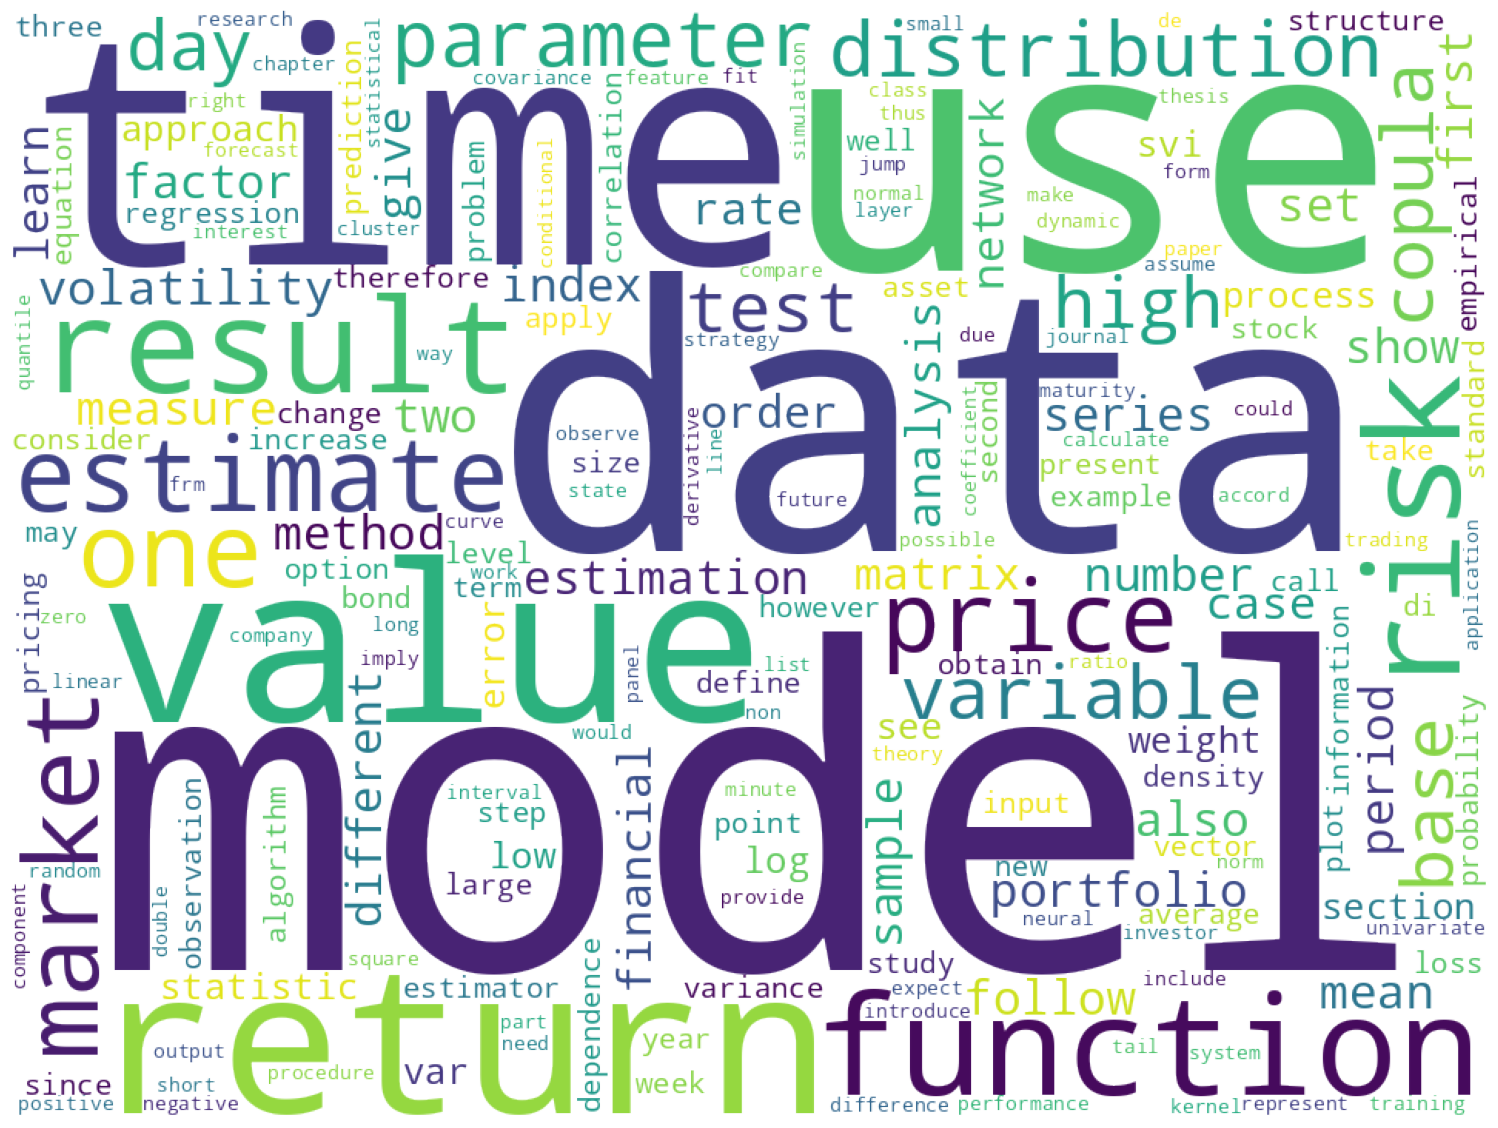

In [8]:
# Call the word cloud generation method
corp_maker.make_wordcloud()

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


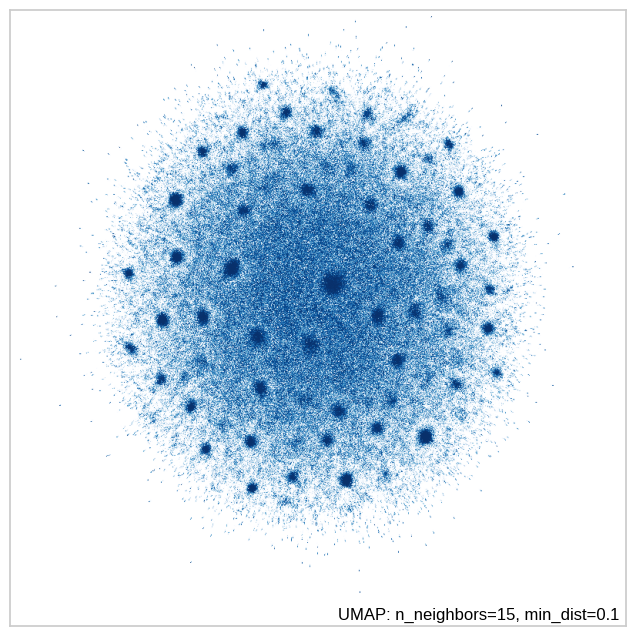

Execution time: 0 hours 45 minutes 35 seconds


In [10]:
# Set begin time
st = time.time()
# Call the umap generation method
corp_maker.make_UMAP()
# Measure execution time
measure_time(st)